In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [4]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


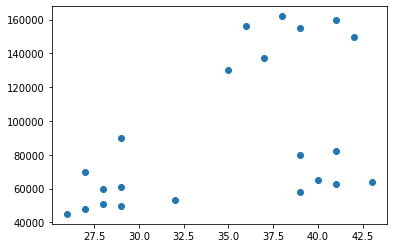

In [6]:
plt.scatter(df["Age"], df["Income($)"])
plt.show()

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [10]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


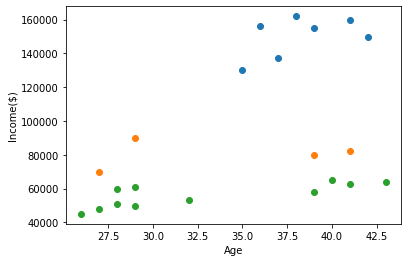

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1["Income($)"])
plt.scatter(df2.Age, df2["Income($)"])
plt.scatter(df3.Age, df3["Income($)"])

plt.xlabel("Age")
plt.ylabel("Income($)")

plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])

df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])

df["Age"] = scaler.transform(df[["Age"]])

df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [15]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[["Age", "Income($)"]])

In [16]:
df["cluster"] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


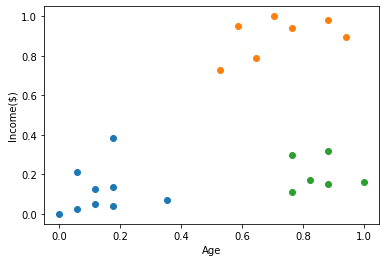

In [17]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1["Income($)"])
plt.scatter(df2.Age, df2["Income($)"])
plt.scatter(df3.Age, df3["Income($)"])

plt.xlabel("Age")
plt.ylabel("Income($)")

plt.show()

In [18]:
sse = []

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22443334487241415,
 0.16858512236029757,
 0.1326541982724516,
 0.10188787724979426]

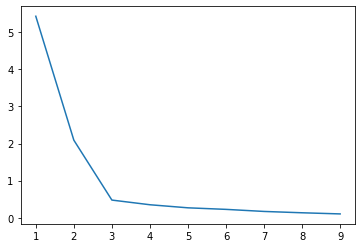

In [20]:
plt.plot(range(1,10), sse)